In [1]:
from Game import *

Version:  0.3.14


# Fanorona (5×5 Variant)

## Board
- A **5×5 grid** of points.  
- Lines connect **horizontally, vertically, and diagonally** (like king moves in chess).  
- There are 25 intersections in total.  

---

## Setup
- Two players, each with **12 stones** (● and ○).  
- Stones are placed on all points **except the center (12)**.  
- Traditionally:  
  - Top 2 rows = Player A’s stones.  
  - Bottom 2 rows = Player B’s stones.  
  - Middle row = split, with the center left empty.  

Example starting position:  
```
● ● ● ● ●
● ● ● ● ●
● ● ⊙ ○ ○
○ ○ ○ ○ ○
○ ○ ○ ○ ○
```

(⊙ = empty center)

---

## Moves
1. A piece may **move one step** along a connecting line into an adjacent empty point.  
2. **Capturing happens in two ways:**  
   - **Approach capture**: If you move **toward** a line of adjacent enemy pieces, all contiguous enemies in that line are captured.  
   - **Withdrawal capture**: If you move **away** from a line of adjacent enemy pieces, those enemies are captured.  
3. **Multiple captures**: After a capture, the same piece may continue capturing, provided it does not revisit the same point in the sequence.  
4. A move can switch between **approach** and **withdrawal** captures in the same sequence.  

---

## Goal
- Win by **capturing all opponent pieces**.  
- If neither player can force progress, the game is a draw.  

---

## Capture Examples

### Example 1 — Approach Capture
```
● ⊙ ○ ○ ○
```
- ● moves **right into ⊙**.  
- This is **toward** the line of ○’s.  
- Result: the three ○’s are captured.  

Resulting board:  
```
● ● ⊙ ⊙ ⊙
```

---

### Example 2 — Withdrawal Capture
```
○ ○ ○ ● ⊙
```
- ● moves **right into ⊙**.  
- This is **away** from the contiguous ○’s to the left.  
- Result: the three ○’s are captured.  

Resulting board:  
```
⊙ ⊙ ⊙ ⊙ ●
```

---

### Example 3 — Combined Example
```
● ○ ○ ○ ● ⊙
```
Positions labeled:  
```
[0] ●   [1] ○   [2] ○   [3] ○   [4] ●   [5] ⊙
```

- The right-hand ● at [4] moves into [5].  
- This is a **withdrawal** from the three contiguous ○’s at [1], [2], [3].  
- All three ○’s are captured.  

Resulting board:  
```
● ⊙ ⊙ ⊙ ⊙ ●
```

---

## Why It’s Fun
- The 5×5 version plays quickly (10–15 minutes).  
- **Captures can chain dramatically**, creating big swings.  
- The tension between **approach** and **withdrawal** makes every move strategic.  


# Instructions for AI

I am implementing Fanorona with a particular game library.  It has a Board class that can be indexed by location, like:


    state=Board(5,5)
    state[0]=1   # index with location
    state[1,2]=2  # index with row and column, both 0-indexed


     1  0  0  0  0 
     0  0  2  0  0 
     0  0  0  0  0 
     0  0  0  0  0 
     0  0  0  0  0 

The library expects 5 functions, which we will implement in turn.  First is initial_state which takes no arguments and returns the initial state.  Please write the initial_state function for Fanorona.

I prefer to write functions in terms in single-integer locations whereever possible.  the Board defaults to 0's so you don't need to do that.  please write the functions using single-integer locations instead of row and column where possible.  Where it makes sense to use row and column, there are methods of the Board class to convert, so you don't need divmod.  for example

    location=5
    state.col(location)  # returns the column for the location
    state.row(location)  # returns the row for the location

the next function is show_state which takes state and player and prints out the current board.  the Board class can also do this:

    state.pieces=['.','O','X']

which sets the display of the pieces when printing out the state.  add this to initial_state and write the show_state function.

A move will be a length-2 list of start and end locations for a piece.  the valid_moves function takes a state and a player and returns a list of all of the valid moves for that player.  Please write this function and I'll give feedback on it when I see it.

I don't like nested loops.  make a neighbors function to return all of the single-integer neighbors of a given location, and rewrite the valid_moves function. 

the function update_state takes a state, player, and a move and returns a new_state with the pieces updated. please write this and I'll give feedback..  update state has to include the capture and withdrawel as well.

the function win_status takes a state (after the update state is called), the player (that made the last move) and returns 'win' if this updated state is a winning state for that player, 'lose' if it is a losing state, 'stalemate' for a stalemate, or None otherwise (just a mid-game state).  since this state will not be given a move by the current player, the my_moves is not relevant. 


now I want a heuristic function which takes a state and player and returns a number between -1 and 1 for the value of the state based off of a heuristic like material advantage. clamp to -0.99 and +0.99 because it won't be a perfect measure. 

# Game Functions

In [3]:
def initial_state():
    """
    Return the starting Board for Fanorona (5x5 variant).

    Convention:
      0 = empty (.)
      1 = player 1 (O)
      2 = player 2 (X)
    """
    state = Board(5, 5)
    state.pieces = ['.', 'O', 'X']

    # Top two rows (indices 0–9): player 1
    for i in range(0, 10):
        state[i] = 1

    # Middle row (indices 10–14): 1, 1, 0, 2, 2
    state[10] = 1
    state[11] = 1
    state[12] = 0  # center empty
    state[13] = 2
    state[14] = 2

    # Bottom two rows (indices 15–24): player 2
    for i in range(15, 25):
        state[i] = 2

    return state


def show_state(state, player):
    """
    Print the current board state.
    `player` argument is unused for display but included for consistency.
    """
    print(state)



In [6]:
def neighbors(state, loc):
    """
    Return a list of single-integer neighbor locations (king moves) for `loc`.
    Uses the board's row/col helpers; computes indices in row-major order.
    """
    rows, cols = 5, 5  # or: getattr(state, "rows", 5), getattr(state, "cols", 5)
    r, c = state.row(loc), state.col(loc)
    out = []

    for dr in (-1, 0, 1):
        for dc in (-1, 0, 1):
            if dr == 0 and dc == 0:
                continue
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols:
                out.append(nr * cols + nc)  # single-integer location

    return out


def valid_moves(state, player):
    """
    Return all single-step moves [start, end] for `player` into empty neighbors.
    (This is the movement skeleton; capture sequences will be layered on later.)
    """
    moves = []
    total = 25  # 5x5

    for start in range(total):
        if state[start] != player:
            continue
        for end in neighbors(state, start):
            if state[end] == 0:
                moves.append([start, end])

    return moves

In [7]:
def update_state(state, player, move):
    """
    Apply a single-step Fanorona move [start, end] for `player` and return a new Board.
    Captures:
      - Approach capture: moving TOWARD a contiguous line of enemy pieces removes them.
      - Withdrawal capture: moving AWAY from a contiguous line of enemy pieces removes them.
    If both are available on the same step, this implementation chooses APPROACH by default.

    Assumes:
      - Players are 1 and 2.
      - `move` is a legal one-step move (adjacent end and empty).
      - Multi-capture chaining is handled by the caller via multiple calls if desired.
    """
    start, end = move
    opponent = 3 - player

    # Copy state so we return a new board
    new_state = state

    # Movement direction (dr, dc) from start -> end
    rs, cs = state.row(start), state.col(start)
    re, ce = state.row(end), state.col(end)
    dr = re - rs
    dc = ce - cs

    # Helper: collect contiguous opponent stones starting from (r0, c0) stepping (dr, dc)
    def collect_ray(r0, c0, dr, dc):
        captures = []
        r, c = r0 + dr, c0 + dc
        while 0 <= r < 5 and 0 <= c < 5:
            idx = r * 5 + c
            if new_state[idx] == opponent:
                captures.append(idx)
                r += dr
                c += dc
            else:
                break
        return captures

    # Approach: from END, look forward along (dr, dc)
    approach_caps = collect_ray(re, ce, dr, dc)

    # Withdrawal: from START, look backward along (-dr, -dc)
    withdrawal_caps = collect_ray(rs, cs, -dr, -dc)

    # Decide which capture to perform (if any)
    if approach_caps and withdrawal_caps:
        chosen_caps = approach_caps   # default to approach if both available
    elif approach_caps:
        chosen_caps = approach_caps
    elif withdrawal_caps:
        chosen_caps = withdrawal_caps
    else:
        chosen_caps = []

    # Execute the move
    new_state[end] = player
    new_state[start] = 0

    # Remove captured stones
    for idx in chosen_caps:
        new_state[idx] = 0

    return new_state

In [8]:
def win_status(state, player):
    """
    Given the state AFTER `player` just moved, return:
      - 'win'       if the opponent has no pieces or no legal moves
      - 'lose'      if player has no pieces (safety check)
      - 'stalemate' if both players have no pieces (extremely rare)
      - None        otherwise (game continues)
    """
    opponent = 3 - player
    total = 25  # 5x5 board

    # Count pieces
    p_count = sum(1 for i in range(total) if state[i] == player)
    o_count = sum(1 for i in range(total) if state[i] == opponent)

    if o_count == 0 and p_count > 0:
        return 'win'
    if p_count == 0 and o_count > 0:
        return 'lose'
    if o_count == 0 and p_count == 0:
        return 'stalemate'

    # Check opponent mobility
    opp_moves = valid_moves(state, opponent)
    if not opp_moves:
        return 'win'

    return None

In [9]:
def human_move(state,player):
    state.show_locations()
    moves=valid_moves(state,player)
    print("Valid moves are: ",moves)
    move=None
    while move not in moves:
        move_input=input("Enter your move as start,end: ")
        start,end=move_input.split(",")
        move=[int(start),int(end)]

    return move

human_agent=Agent(human_move) 

In [10]:
def random_move(state,player):
    return random.choice(valid_moves(state,player))
random_agent=Agent(random_move)    

In [11]:

def heuristic(state, player):
    """
    Heuristic evaluation in [-0.99, 0.99] for Fanorona (5x5).
    Combines:
      - Material advantage (normalized)
      - Mobility advantage (normalized)
      - Small center-control bonus (index 12)
    Weights: 0.7 * material + 0.3 * mobility (+/- 0.05 for center control)
    """


    material=material_heuristic(state,player)
    mobility = mobility_heuristic(state,player)

    # --- Weighted sum ---
    score = 0.7 * material + 0.3 * mobility

    score+=center_control_heuristic(state,player)

    # --- Clamp to [-0.99, 0.99] ---
    if score > 0.99:
        score = 0.99
    elif score < -0.99:
        score = -0.99

    return score

In [12]:
from Game.minimax import *
def minimax_move(state,player):
    values,actions = minimax_values(state,player,display=False,maxdepth=2)
    return top_choice(actions,values)
minimax_agent=Agent(minimax_move)

In [13]:
# g=Game()
# g.run(human_agent,random_agent)

In [14]:
%%time
g=Game(number_of_games=3)
g.display=False
results=g.run(minimax_agent,random_agent)
results

CPU times: user 21.7 s, sys: 90.5 ms, total: 21.8 s
Wall time: 21.8 s


[1, 1, 1]

In [15]:
g=Game(number_of_games=1)
g.check_repeated_states=True # # give your opponent a repeated state and you lose
results=g.run(minimax_agent,minimax_agent)

====
Game  1
 O  O  O  O  O 
 O  O  O  O  O 
 O  O  .  X  X 
 X  X  X  X  X 
 X  X  X  X  X 

Player 1 moves [8, 12]
 O  O  O  O  O 
 O  O  O  .  O 
 O  O  O  X  X 
 X  .  X  X  X 
 .  X  X  X  X 

Player 2 moves [21, 16]
 O  .  O  O  O 
 O  .  O  .  O 
 O  .  O  X  X 
 X  X  X  X  X 
 .  .  X  X  X 

Player 1 moves [7, 11]
 O  .  O  O  O 
 O  .  .  .  O 
 O  O  O  X  X 
 .  X  X  X  X 
 .  .  X  X  X 

Player 2 moves [13, 8]
 O  .  O  .  O 
 O  .  .  X  O 
 O  O  O  .  X 
 .  X  X  X  X 
 .  .  X  X  X 

Player 1 moves [11, 6]
 O  .  O  .  O 
 O  O  .  X  O 
 O  .  O  .  X 
 .  .  X  X  X 
 .  .  X  X  X 

Player 2 moves [8, 7]
 O  .  O  .  O 
 .  .  X  .  O 
 O  .  O  .  X 
 .  .  X  X  X 
 .  .  X  X  X 

Player 1 moves [9, 8]
 O  .  O  .  O 
 .  .  .  O  . 
 O  .  O  .  X 
 .  .  X  X  X 
 .  .  X  X  X 

Player 2 moves [22, 16]
 O  .  O  .  O 
 .  .  .  O  . 
 .  .  O  .  X 
 .  X  X  X  X 
 .  .  .  X  X 

Player 1 moves [4, 9]
 O  .  O  .  . 
 .  .  .  O  O 
 .  .  O  .  . 
 .  

In [16]:
%%time
g=Game(number_of_games=10)
g.display=False
g.check_repeated_states=True # # give your opponent a repeated state and you lose
results=g.run(minimax_agent,minimax_agent)
results

CPU times: user 95.1 ms, sys: 1.65 ms, total: 96.7 ms
Wall time: 95.9 ms


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

player 2 with bad heuristic

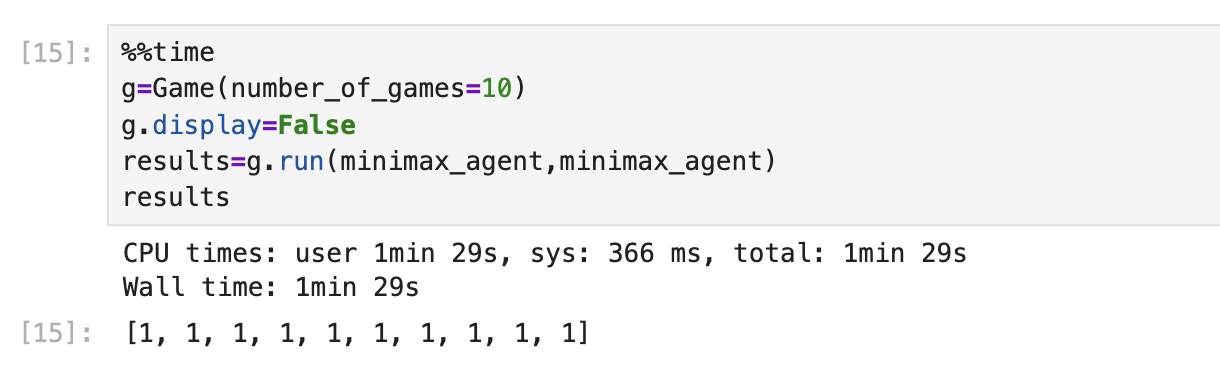

player 1 with bad heuristic

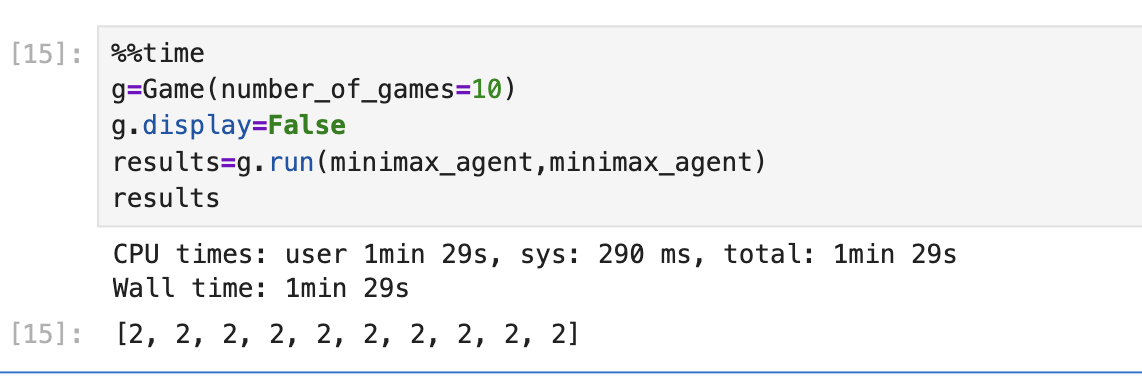

player 1 and 2 with full heuristic

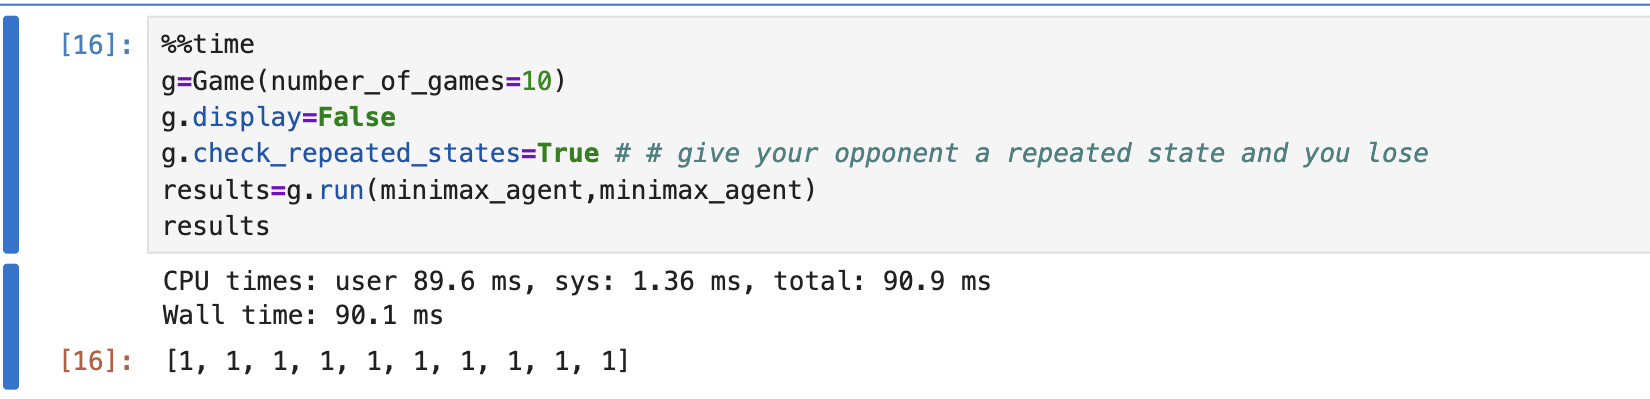

player 1 with just material advantage

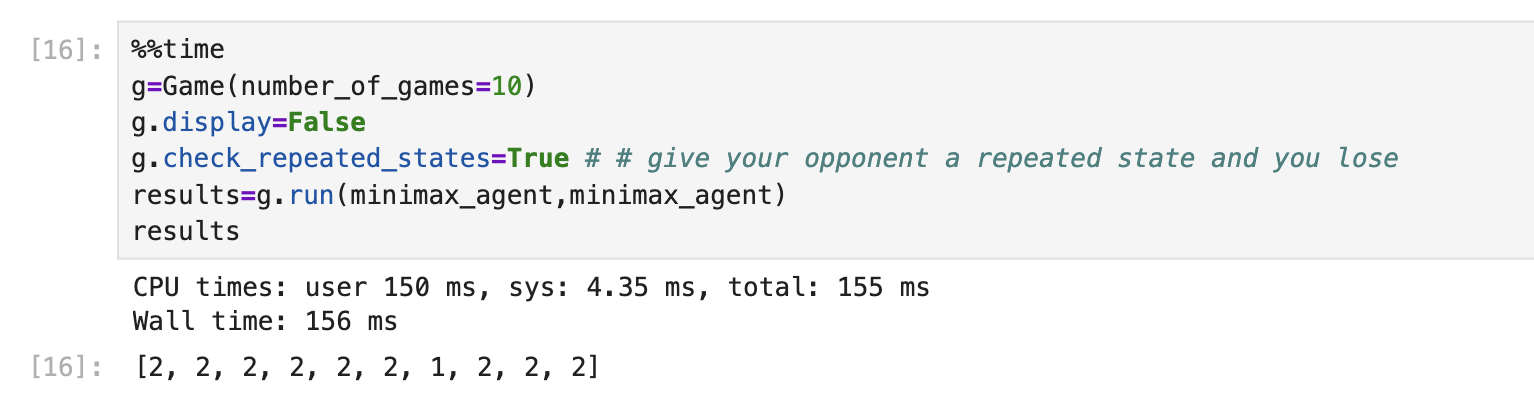
